In [12]:
import opt_mo
import numpy as np
import sympy as sym
import itertools

sym.init_printing()


In [2]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")


In [3]:
p = (p_1, p_2, p_3, p_4)
q = (q_1, q_2, q_3, q_4)


In [4]:
pi_1, pi_2, pi_3, pi_4 = sym.symbols("pi_1, pi_2, pi_3, pi_4")
pi = (pi_1, pi_2, pi_3, pi_4)


**Theorem 1 Proof**

As discrubed in Section 2 the utility of a memory one player against another is given by the steady states of M
multiplied by the payoffs.

In [5]:
M = opt_mo.mem_one_match_markov_chain(player=p, opponent=q)


In [6]:
ss = opt_mo.steady_states(M, pi)


In [7]:
v = sym.Matrix([[ss[pi_1]], [ss[pi_2]], [ss[pi_3]], [ss[pi_4]]])


In [8]:
utility = v.dot(np.array([3, 0, 5, 1]))

In [10]:
expr = utility.factor()

In [11]:
numerator, denominator = sym.fraction(expr)

In [29]:
numerator


In [13]:
numerator_elements = [[numerator.coeff(f1 * f2) * f1 * f2 for f2 in p] for f1 in p]

In [15]:
flat_elements = list(itertools.chain.from_iterable(numerator_elements))

In [22]:
cross_prod = sum(flat_elements) / 2

In [33]:
cross_prod

In [23]:
sym.latex(sum(flat_elements) / 2).replace("\\left", "").replace("\\right", "")

'p_{1} p_{2} (q_{1} q_{2} - 5 q_{1} q_{4} - q_{1} - q_{2} q_{3} + 5 q_{3} q_{4} + q_{3}) + p_{1} p_{3} (- q_{1} q_{3} + q_{2} q_{3}) + p_{1} p_{4} (5 q_{1} q_{3} - 5 q_{3} q_{4}) + p_{2} p_{3} (- q_{1} q_{2} + q_{1} q_{3} + 3 q_{2} q_{4} + q_{2} - 3 q_{3} q_{4} - q_{3}) + p_{2} p_{4} (- 5 q_{1} q_{3} + 5 q_{1} q_{4} + 3 q_{2} q_{3} - 3 q_{2} q_{4} + 2 q_{3} - 2 q_{4}) + p_{3} p_{4} (- 3 q_{2} q_{3} + 3 q_{3} q_{4})'

In [42]:
linear_expr = numerator.subs({p_2: 0, p_3: 0, p_4: 0}).coeff(p_1) * p_1
linear_expr += numerator.subs({p_1: 0, p_3: 0, p_4: 0}).coeff(p_2) * p_2
linear_expr += numerator.subs({p_1: 0, p_2: 0, p_4: 0}).coeff(p_3) * p_3
linear_expr += numerator.subs({p_1: 0, p_2: 0, p_3: 0}).coeff(p_4) * p_4

In [43]:
linear_expr

In [58]:
sym.latex(linear_expr).replace("\\left", "").replace("\\right", "")

'p_{1} (- q_{1} q_{2} + 5 q_{1} q_{4} + q_{1}) + p_{2} (q_{2} q_{3} - q_{2} - 5 q_{3} q_{4} - q_{3} + 5 q_{4} + 1) + p_{3} (q_{1} q_{2} - q_{2} q_{3} - 3 q_{2} q_{4} - q_{2} + q_{3}) + p_{4} (- 5 q_{1} q_{4} + 3 q_{2} q_{4} + 5 q_{3} q_{4} - 5 q_{3} + 2 q_{4})'

In [54]:
constant = numerator.subs({p_2: 0, p_3: 0, p_4: 0, p_1: 0})

In [55]:
constant

In [59]:
sym.latex(constant)

'q_{2} - 5 q_{4} - 1'

In [61]:
((constant + linear_expr + cross_prod) - numerator).simplify()

**Denominator**

In [62]:
denominator_elements = [[denominator.coeff(f1 * f2) * f1 * f2 for f2 in p] for f1 in p]

In [66]:
flat_elements = list(itertools.chain.from_iterable(denominator_elements))

In [67]:
cross_prod = sum(flat_elements) / 2

In [68]:
cross_prod

In [70]:
sym.latex(cross_prod).replace("\\left", "").replace("\\right", "")

'p_{1} p_{2} (q_{1} q_{2} - q_{1} q_{4} - q_{1} - q_{2} q_{3} + q_{3} q_{4} + q_{3}) + p_{1} p_{3} (- q_{1} q_{3} + q_{1} q_{4} + q_{2} q_{3} - q_{2} q_{4}) + p_{1} p_{4} (- q_{1} q_{2} + q_{1} q_{3} + q_{1} + q_{2} q_{4} - q_{3} q_{4} - q_{4}) + p_{2} p_{3} (- q_{1} q_{2} + q_{1} q_{3} + q_{2} q_{4} + q_{2} - q_{3} q_{4} - q_{3}) + p_{2} p_{4} (- q_{1} q_{3} + q_{1} q_{4} + q_{2} q_{3} - q_{2} q_{4}) + p_{3} p_{4} (q_{1} q_{2} - q_{1} q_{4} - q_{2} q_{3} - q_{2} + q_{3} q_{4} + q_{4})'

In [71]:
linear_expr = denominator.subs({p_2: 0, p_3: 0, p_4: 0}).coeff(p_1) * p_1
linear_expr += denominator.subs({p_1: 0, p_3: 0, p_4: 0}).coeff(p_2) * p_2
linear_expr += denominator.subs({p_1: 0, p_2: 0, p_4: 0}).coeff(p_3) * p_3
linear_expr += denominator.subs({p_1: 0, p_2: 0, p_3: 0}).coeff(p_4) * p_4

In [74]:
sym.latex(linear_expr).replace("\\left", "").replace("\\right", "")

'p_{1} (- q_{1} q_{2} + q_{1} q_{4} + q_{1}) + p_{2} (q_{2} q_{3} - q_{2} - q_{3} q_{4} - q_{3} + q_{4} + 1) + p_{3} (q_{1} q_{2} - q_{2} q_{3} - q_{2} + q_{3} - q_{4}) + p_{4} (- q_{1} q_{4} + q_{2} + q_{3} q_{4} - q_{3} + q_{4} - 1)'

In [75]:
constant = denominator.subs({p_2: 0, p_3: 0, p_4: 0, p_1: 0})

In [76]:
constant

In [77]:
sym.latex(constant)

'q_{2} - q_{4} - 1'

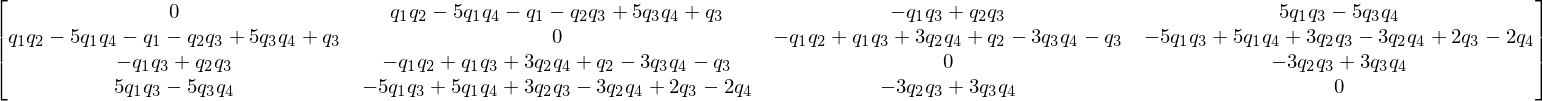

In [165]:
sym.Matrix(Q_num)

In [174]:
n.collect(p_1 * p_2).collect(p_1 * p_3).collect(p_1 * p_4).collect(p_2 * p_3).collect(p_2 * p_4)

In [196]:
element = [[n.coeff(f1 * f2) * f1 * f2 for f2 in p] for f1 in p]

In [192]:
flat_elements = list(itertools.chain.from_iterable(list2d))

In [194]:
flat_elements

<function __main__.<lambda>(l)>

In [185]:
expr = 0
for i in range(3):
    for j in range()
    expr+= n.coeff(p[i] * p[i + 1]) * p[i] * p[i + 1]

In [186]:
expr

In [179]:
(n - expr).simplify()